In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

from bounds import *
from dgp import *
from vset import *
import estimation, utils, experiments, vset, plots
import pandas as pd



# Debugging IV identification

In [2]:
Dx, Du = 5, 0
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 2
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)


KeyError: 't_coeffs'

## Test learning outcome probabilities

In [3]:
msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='oracle', K=5)

,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.442321,0.205203,-0.299383,0.046694,1,1,-0.044788,m_y=1,MSM,oracle
1,-0.453623,0.184842,-0.314613,0.024438,1,1,-0.303794,m_y=0,MSM,oracle
2,-0.621289,0.505295,-0.244548,0.128554,1,1,0.122409,m_a=0,MSM,oracle
3,-0.110657,0.269244,-0.110657,0.269244,1,1,0.124838,m_a=1,MSM,oracle
4,-0.367146,0.388546,-0.122113,0.143513,1,1,0.092100,m_u,MSM,oracle


In [84]:
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)

outcome regression error: 0.043218950581498154
propensitiy error: 0.026068173306555392
outcome regression error: 0.03883126286322675
propensitiy error: 0.025846728054586564
outcome regression error: 0.04162230822009172
propensitiy error: 0.024802039095536528
outcome regression error: 0.039635756080474094
propensitiy error: 0.02578407892389513
outcome regression error: 0.03992138284299188
propensitiy error: 0.025476313405033636


,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.545193,-0.338356,-0.508254,-0.377225,1.0,1.0,-0.449353,m_y=1,MSM,plugin
1,-0.550948,-0.342820,-0.514499,-0.381328,1.0,1.0,-0.458090,m_y=0,MSM,plugin
2,-0.280651,0.218070,-0.195899,0.133319,1.0,1.0,0.001760,m_a=0,MSM,plugin
3,-0.027843,0.057846,-0.027843,0.057846,1.0,1.0,0.007186,m_a=1,MSM,plugin
4,-0.084671,0.085471,-0.028803,0.029603,1.0,1.0,0.002100,m_u,MSM,plugin


# Coverage sample size experiment 
- Construct 95% bootstrap CI around plug-in estimates of the regret. Plot as a function of sample size.
- Also plot coverage as a function of sample size.

In [11]:
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.5
}

msm_dgp = set_dgp_config(dgp, 'MSM')
Ns = [100, 300, 600, 900, 1200, 1500, msm_dgp['N']-1]
coveragedf = experiments.estimation_coverage_experiment(msm_dgp, Ns, Nsims=30)



outcome regression error: 0.12955887796007529
propensitiy error: 0.14023211667175947
outcome regression error: 0.16420629986844576
propensitiy error: 0.10431991479198058
outcome regression error: 0.18519937980630466
propensitiy error: 0.1239783360137084
outcome regression error: 0.163583274069326
propensitiy error: 0.18490675130666218
outcome regression error: 0.1594578216162204
propensitiy error: 0.17076477471453827
outcome regression error: 0.1989131462712505
propensitiy error: 0.11123882564022262
outcome regression error: 0.19286927751092414
propensitiy error: 0.056989378264298084
outcome regression error: 0.21219936886400736
propensitiy error: 0.12790620479437778
outcome regression error: 0.20844915157036897
propensitiy error: 0.10655265232941868
outcome regression error: 0.11425073449308867
propensitiy error: 0.09590320004502231
outcome regression error: 0.10655616008756752
propensitiy error: 0.07880688006208149
outcome regression error: 0.16223294772272848
propensitiy error: 0.10

outcome regression error: 0.12163261592647671
propensitiy error: 0.126179743612198
outcome regression error: 0.18192523354579807
propensitiy error: 0.07321295189361124
outcome regression error: 0.21133340859537258
propensitiy error: 0.10581265874774622
outcome regression error: 0.199475181063848
propensitiy error: 0.1292192546078902
outcome regression error: 0.22001282284870677
propensitiy error: 0.12216986262923457
outcome regression error: 0.1794408697326788
propensitiy error: 0.09905130562260192
outcome regression error: 0.1829114771538852
propensitiy error: 0.21944003795206882
outcome regression error: 0.16692566041368795
propensitiy error: 0.062988930343341
outcome regression error: 0.25631296453846597
propensitiy error: 0.07879905185664596
outcome regression error: 0.12876114450968354
propensitiy error: 0.0718872126437184
outcome regression error: 0.11368574877941766
propensitiy error: 0.12195180694183141
outcome regression error: 0.11100837569627668
propensitiy error: 0.15848027

outcome regression error: 0.12477412917595307
propensitiy error: 0.07344592264944103
outcome regression error: 0.11570837999279157
propensitiy error: 0.09614539339466112
outcome regression error: 0.13777248944875523
propensitiy error: 0.07390376223760106
outcome regression error: 0.1241211601578457
propensitiy error: 0.07811612375758119
outcome regression error: 0.16117477936591557
propensitiy error: 0.09086538216740661
outcome regression error: 0.1161868843285981
propensitiy error: 0.061436936606000435
outcome regression error: 0.1588028525174301
propensitiy error: 0.08002827133596671
outcome regression error: 0.21574466043771776
propensitiy error: 0.09237959276321538
outcome regression error: 0.16997846943966927
propensitiy error: 0.08495091915922502
outcome regression error: 0.1659310629840476
propensitiy error: 0.09537130311371027
outcome regression error: 0.13926566377180785
propensitiy error: 0.08000962552428552
outcome regression error: 0.10993924878311821
propensitiy error: 0.0

outcome regression error: 0.09805393306775928
propensitiy error: 0.06229175407229247
outcome regression error: 0.09473527016137082
propensitiy error: 0.09156566167053531
outcome regression error: 0.09952846940189351
propensitiy error: 0.0716334158940271
outcome regression error: 0.10148339885113875
propensitiy error: 0.07331983786749507
outcome regression error: 0.10528402033345806
propensitiy error: 0.07726592014365717
outcome regression error: 0.0961047879770302
propensitiy error: 0.08558196520212341
outcome regression error: 0.11848892166337735
propensitiy error: 0.08170727772731956
outcome regression error: 0.10798484083919663
propensitiy error: 0.067258857584926
outcome regression error: 0.11881232604482468
propensitiy error: 0.0770057695103441
outcome regression error: 0.11107142112420203
propensitiy error: 0.07717224993924686
outcome regression error: 0.12941773817117738
propensitiy error: 0.07221195435206702
outcome regression error: 0.11054305018595988
propensitiy error: 0.074

outcome regression error: 0.09536478363744268
propensitiy error: 0.08925097000303137
outcome regression error: 0.11658182133898944
propensitiy error: 0.07145928516437133
outcome regression error: 0.09576665440831486
propensitiy error: 0.07514295009802237
outcome regression error: 0.0941883540464483
propensitiy error: 0.06276027164127423
outcome regression error: 0.09276456079401933
propensitiy error: 0.06497875748646499
outcome regression error: 0.09110245427181021
propensitiy error: 0.06527066982873984
outcome regression error: 0.09297010073010424
propensitiy error: 0.06839362315953737
outcome regression error: 0.10849021125253804
propensitiy error: 0.06882506620969484
outcome regression error: 0.10083722838449558
propensitiy error: 0.0693162059715109
outcome regression error: 0.09223914311341658
propensitiy error: 0.0645005419212966
outcome regression error: 0.12131327818991604
propensitiy error: 0.07689591989188736
outcome regression error: 0.10595448185796821
propensitiy error: 0.0

outcome regression error: 0.0919473151895299
propensitiy error: 0.07428544149642008
outcome regression error: 0.11009474121402671
propensitiy error: 0.06350646059136898
outcome regression error: 0.08727555421043702
propensitiy error: 0.07124325498642124
outcome regression error: 0.11906538457122602
propensitiy error: 0.06878325591726069
outcome regression error: 0.0984134887759052
propensitiy error: 0.06513224061538914
outcome regression error: 0.11884278470867941
propensitiy error: 0.07971323813877346
outcome regression error: 0.09121938928465924
propensitiy error: 0.06257007629737976
outcome regression error: 0.10292571582413722
propensitiy error: 0.0690790777121296
outcome regression error: 0.0970775163892256
propensitiy error: 0.06858615592250616
outcome regression error: 0.10390765528823002
propensitiy error: 0.0681237202809497
outcome regression error: 0.09600489360783221
propensitiy error: 0.0619958614808069
outcome regression error: 0.10991093517637959
propensitiy error: 0.0753

outcome regression error: 0.09663987797486086
propensitiy error: 0.06151886171971479
outcome regression error: 0.09092781518655355
propensitiy error: 0.06315055931030347
outcome regression error: 0.0868043074466314
propensitiy error: 0.06534662552412426
outcome regression error: 0.09531184803505204
propensitiy error: 0.0639913427748562
outcome regression error: 0.10185119407021706
propensitiy error: 0.0694730729038979
outcome regression error: 0.10065198265351707
propensitiy error: 0.06837322449279812
outcome regression error: 0.09192960886896077
propensitiy error: 0.06162791855443285
outcome regression error: 0.10422481057672509
propensitiy error: 0.06351632808032001
outcome regression error: 0.10482069968557489
propensitiy error: 0.06604392855031678
outcome regression error: 0.09519947392717837
propensitiy error: 0.06449170539823341
outcome regression error: 0.10244825332642332
propensitiy error: 0.06561775559970896
outcome regression error: 0.10210605307287732
propensitiy error: 0.0

outcome regression error: 0.09609357502962038
propensitiy error: 0.06821009993959064
outcome regression error: 0.09149794463433762
propensitiy error: 0.06051533269114365
outcome regression error: 0.10575792858459729
propensitiy error: 0.0652617002368108
outcome regression error: 0.10124667241487831
propensitiy error: 0.06757508281296834
outcome regression error: 0.10755994170127685
propensitiy error: 0.06737714547799124
outcome regression error: 0.10950026416405692
propensitiy error: 0.07220957993562523
outcome regression error: 0.10944663802549735
propensitiy error: 0.06881933463707858
outcome regression error: 0.08906340910316504
propensitiy error: 0.06801133883887185
outcome regression error: 0.09567487488697814
propensitiy error: 0.06399237179603606
outcome regression error: 0.09774796656308696
propensitiy error: 0.0770927824953851
outcome regression error: 0.09411659313452019
propensitiy error: 0.06412431807054714
outcome regression error: 0.10378816741032203
propensitiy error: 0.

outcome regression error: 0.10467550974899334
propensitiy error: 0.0601824352549328
outcome regression error: 0.09774467888024718
propensitiy error: 0.06838609338736841
outcome regression error: 0.10386886077312837
propensitiy error: 0.06399366406030715
outcome regression error: 0.08735271803423653
propensitiy error: 0.061882679979779746
outcome regression error: 0.09217321416734411
propensitiy error: 0.06767143433029908
outcome regression error: 0.09883200680684484
propensitiy error: 0.06739852603230792
outcome regression error: 0.0898908107462426
propensitiy error: 0.06772226299251334
outcome regression error: 0.08845529048771268
propensitiy error: 0.061843560493479
outcome regression error: 0.09341660764941463
propensitiy error: 0.06913745419276454
outcome regression error: 0.08691940451547471
propensitiy error: 0.06269403157460185
outcome regression error: 0.10099864811556808
propensitiy error: 0.06835606054954872
outcome regression error: 0.09631921056225029
propensitiy error: 0.0

outcome regression error: 0.08774470624108534
propensitiy error: 0.05873194683546908
outcome regression error: 0.08936771095003934
propensitiy error: 0.0585850059601533
outcome regression error: 0.0931202837398416
propensitiy error: 0.059094960067676734
outcome regression error: 0.08704973534778399
propensitiy error: 0.05715670851395645
outcome regression error: 0.08863540668156862
propensitiy error: 0.05897425090296075
outcome regression error: 0.08971202450223595
propensitiy error: 0.05997188682589472
outcome regression error: 0.08859410182648111
propensitiy error: 0.057178245807486705
outcome regression error: 0.08743046648058299
propensitiy error: 0.05824913772375139
outcome regression error: 0.09078115936968723
propensitiy error: 0.05861364211319581
outcome regression error: 0.09080660894983882
propensitiy error: 0.05931364808812147
outcome regression error: 0.0918976435127544
propensitiy error: 0.06027080675607158
outcome regression error: 0.08801654210112282
propensitiy error: 0

outcome regression error: 0.08914578195931978
propensitiy error: 0.05728173695385568
outcome regression error: 0.09214276331459599
propensitiy error: 0.060134970442582515
outcome regression error: 0.08731235373918703
propensitiy error: 0.0587238055780648
outcome regression error: 0.09040320391059851
propensitiy error: 0.058329798612061244
outcome regression error: 0.0907114588984857
propensitiy error: 0.059263816851531086
outcome regression error: 0.09058963265637321
propensitiy error: 0.05833696105770446
outcome regression error: 0.08924172843459803
propensitiy error: 0.058539560912469084
outcome regression error: 0.09011109296209113
propensitiy error: 0.05956070570277251
outcome regression error: 0.08918406975342576
propensitiy error: 0.058602459169441366
outcome regression error: 0.09022692384204398
propensitiy error: 0.05884506676384809


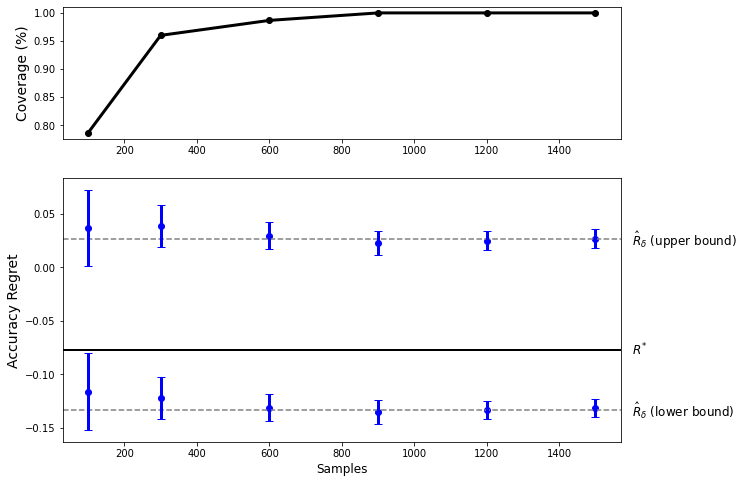

In [43]:
ns_data = experiments.get_est_exp_metadata(coveragedf, Ns)
ns_data = ns_data[ns_data['metric'] == 'm_u']

oracle_up = ns_data['Rd_up_oracle'].tolist()[-1]
oracle_down = ns_data['Rd_down_oracle'].tolist()[-1]
oracle = ns_data['R_oracle'].tolist()[-1]
ns_data = ns_data.iloc[:-1,:]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1,2]})

# Coverage plot
samples = coveragedf[(coveragedf['est_method'] == 'plugin') & (coveragedf['metric'] == 'm_u')]
coverage = samples.groupby('N').mean()['Rd_coverage'].tolist()[:-1]
N = samples.groupby('N').mean().reset_index()['N'].tolist()[:-1]

ax1.plot(N, coverage, marker='o', color='k', linewidth=3)
ax1.set_ylabel('Coverage (%)', fontsize=14)


# Interval estimation plot
ax2.axhline(oracle_up, color='grey', linestyle='--')
ax2.axhline(oracle_down, color='grey', linestyle='--')
ax2.axhline(oracle, color='k', linewidth=2,label='$R^*$')

ax2.scatter(ns_data['N'], ns_data['Rd_up_pl_mean'], color='blue')
for ix,n in enumerate(ns_data['N']):
    ax2.errorbar(n, ns_data['Rd_up_pl_mean'].tolist()[ix], yerr=ns_data['Rd_up_pl_ci'].tolist()[ix],capsize=4, linewidth=3, elinewidth=3, color='blue')

ax2.scatter(ns_data['N'], ns_data['Rd_down_pl_mean'], color='blue')
for ix,n in enumerate(ns_data['N']):
    ax2.errorbar(n, ns_data['Rd_down_pl_mean'].tolist()[ix], yerr=ns_data['Rd_down_pl_ci'].tolist()[ix],capsize=4, linewidth=3, elinewidth=3, color='blue')
    

x_loc = max(ns_data['N']) + 100  # Adjust the offset (10 here) as needed
ax2.text(x_loc, oracle_up, '$\hat{R}_{\delta}$ (upper bound)', va='center', fontsize=12)
ax2.text(x_loc, oracle_down, '$\hat{R}_{\delta}$ (lower bound)', va='center', clip_on=False, fontsize=12)
ax2.text(x_loc, oracle, '$R^{*}$', va='center', fontsize=12)

ax2.set_xlabel('Samples', fontsize=12)
ax2.set_ylabel('Accuracy Regret', fontsize=14)


plt.savefig('figs/pl_estimation.pdf', dpi=500, bbox_inches='tight')



Text(0, 0.5, 'Coverage (%)')

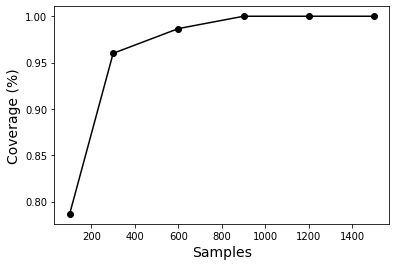

In [13]:
samples = coveragedf[(coveragedf['est_method'] == 'plugin') & (coveragedf['metric'] == 'm_u')]
coverage = samples.groupby('N').mean()['Rd_coverage'].tolist()[:-1]
N = samples.groupby('N').mean().reset_index()['N'].tolist()[:-1]

plt.plot(N, coverage, marker='o', color='k')
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Coverage (%)', fontsize=14)

# Design sensitivity experiment 
- Delta bounds enable certifying a policy improvement up to a larger magnitude of confounding

In [4]:
Dx, Du = 5, 2
nD = Dx+Du


dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.5,
    'lambda_star': 1.1,
    'uniform_pi': True
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)

outcome regression error: 0.06516258687560389
propensitiy error: 0.08533703354091911
outcome regression error: 0.06384119434391117
propensitiy error: 0.08607415785307583
outcome regression error: 0.06366467180308216
propensitiy error: 0.08784705505235013
outcome regression error: 0.06495551914319402
propensitiy error: 0.08814040594960307
outcome regression error: 0.06405952746034627
propensitiy error: 0.08672900957384158
outcome regression error: 0.06422991330151771
propensitiy error: 0.08652959122578216
outcome regression error: 0.06348151839181129
propensitiy error: 0.08546957045735198
outcome regression error: 0.06437285955784781
propensitiy error: 0.087396387335413
outcome regression error: 0.06258810723016806
propensitiy error: 0.08606850353638566
outcome regression error: 0.06580950898990447
propensitiy error: 0.08776311887978795
outcome regression error: 0.06619933687542161
propensitiy error: 0.08751665713614458
outcome regression error: 0.06305383245033022
propensitiy error: 0.

outcome regression error: 0.0627351998989172
propensitiy error: 0.08682495590001485
outcome regression error: 0.0636714559699577
propensitiy error: 0.08771022266684798
outcome regression error: 0.06221873249766533
propensitiy error: 0.08653348964875715
outcome regression error: 0.06390791214932409
propensitiy error: 0.08556038326037123
outcome regression error: 0.06751177088074109
propensitiy error: 0.08771545456820914
outcome regression error: 0.06443926700299418
propensitiy error: 0.08562860822408863
outcome regression error: 0.06579884214362824
propensitiy error: 0.08560116630402657
outcome regression error: 0.06455880545988366
propensitiy error: 0.08965840200786389
outcome regression error: 0.061447373220180165
propensitiy error: 0.08395244463466045
outcome regression error: 0.06478538347612298
propensitiy error: 0.08852735224684906
outcome regression error: 0.06377893845057417
propensitiy error: 0.0877305329577141
outcome regression error: 0.06294704680228672
propensitiy error: 0.

outcome regression error: 0.0644150406467077
propensitiy error: 0.0868159866372727
outcome regression error: 0.06477204746973551
propensitiy error: 0.08616588296514095
outcome regression error: 0.06365359598690105
propensitiy error: 0.08715506497271451
outcome regression error: 0.06377775580299926
propensitiy error: 0.08740555718530003
outcome regression error: 0.063830303820973
propensitiy error: 0.086322284566754
outcome regression error: 0.06164922652364418
propensitiy error: 0.08629534600780152
outcome regression error: 0.06682211429226195
propensitiy error: 0.08963094221475035
outcome regression error: 0.061704826274507164
propensitiy error: 0.08568454690489935
outcome regression error: 0.06525758084545288
propensitiy error: 0.08569438511065251
outcome regression error: 0.06508163116896029
propensitiy error: 0.08674915123491002
outcome regression error: 0.06440121223022155
propensitiy error: 0.08722572676941454
outcome regression error: 0.06548210730159999
propensitiy error: 0.086

outcome regression error: 0.06437944866572703
propensitiy error: 0.08656298941846241
outcome regression error: 0.06199427939153763
propensitiy error: 0.08568186936804187
outcome regression error: 0.06390350801849812
propensitiy error: 0.08658814772261232
outcome regression error: 0.06693767456394073
propensitiy error: 0.08754134690572832
outcome regression error: 0.06282054657908773
propensitiy error: 0.08715490257928624
outcome regression error: 0.06563476470645568
propensitiy error: 0.08718831113876939
outcome regression error: 0.06469269248019105
propensitiy error: 0.08745585623971307
outcome regression error: 0.06344883378974651
propensitiy error: 0.08491107399393955
outcome regression error: 0.06406838201508092
propensitiy error: 0.08725993549185822
outcome regression error: 0.0681956611185148
propensitiy error: 0.08765795992483799
outcome regression error: 0.0633730977255063
propensitiy error: 0.08800297462127768
outcome regression error: 0.06194380588333201
propensitiy error: 0.

outcome regression error: 0.0620305163854973
propensitiy error: 0.08763617190748894
outcome regression error: 0.06535490520075808
propensitiy error: 0.08622314897378308
outcome regression error: 0.06454423447893742
propensitiy error: 0.0870757712915747
outcome regression error: 0.06444345506545546
propensitiy error: 0.08578294147296743
outcome regression error: 0.06485804527131442
propensitiy error: 0.08713176835064458
outcome regression error: 0.06477667912812098
propensitiy error: 0.08819014594778216
outcome regression error: 0.06156660331490725
propensitiy error: 0.08677294920166881
outcome regression error: 0.06471223626053886
propensitiy error: 0.08569826591779094
outcome regression error: 0.06695779233511864
propensitiy error: 0.08782260073139372
outcome regression error: 0.06299286116108692
propensitiy error: 0.085832641611349
outcome regression error: 0.06301430844527472
propensitiy error: 0.0882728938982855
outcome regression error: 0.06295476653930467
propensitiy error: 0.087

outcome regression error: 0.06366498433900832
propensitiy error: 0.08784136172268751
outcome regression error: 0.06360779491652913
propensitiy error: 0.08715791251068579
outcome regression error: 0.06471315161646059
propensitiy error: 0.08633777059453476
outcome regression error: 0.06626724273700485
propensitiy error: 0.08764156855002232
outcome regression error: 0.060656856791031125
propensitiy error: 0.08624898160431764
outcome regression error: 0.06542492007080719
propensitiy error: 0.08632630227379398
outcome regression error: 0.06458189607872691
propensitiy error: 0.08685084454591138
outcome regression error: 0.06529259789356386
propensitiy error: 0.08557764557279968
outcome regression error: 0.06421161198873009
propensitiy error: 0.08621682095044846
outcome regression error: 0.06458925948235644
propensitiy error: 0.0888140569944269
outcome regression error: 0.062115307052883005
propensitiy error: 0.08616030989695521
outcome regression error: 0.06409738617531639
propensitiy error:

outcome regression error: 0.06619149853110662
propensitiy error: 0.0870178575877841
outcome regression error: 0.06489139533494061
propensitiy error: 0.08692254976951795
outcome regression error: 0.06296578086301913
propensitiy error: 0.08559221806044609
outcome regression error: 0.06250209164016045
propensitiy error: 0.08808459125354512
outcome regression error: 0.0639684867028131
propensitiy error: 0.08869453705392778
outcome regression error: 0.0631511815451263
propensitiy error: 0.08729624826648161
outcome regression error: 0.06553577389358489
propensitiy error: 0.08821869038412504
outcome regression error: 0.06445172622821814
propensitiy error: 0.08532103817603576
outcome regression error: 0.06354994332370074
propensitiy error: 0.08521990916526008
outcome regression error: 0.06304286791557759
propensitiy error: 0.08363251267683675
outcome regression error: 0.0645547540386074
propensitiy error: 0.08824584233017156
outcome regression error: 0.06218433391862929
propensitiy error: 0.08

outcome regression error: 0.06497564996564043
propensitiy error: 0.0876824028635552
outcome regression error: 0.06649956008658242
propensitiy error: 0.086282980307361
outcome regression error: 0.06348008700206699
propensitiy error: 0.08829347985339385
outcome regression error: 0.062446679933545045
propensitiy error: 0.08660077650995893
outcome regression error: 0.0635947588003921
propensitiy error: 0.08522546186981715
outcome regression error: 0.0656084523324844
propensitiy error: 0.08738404433617296
outcome regression error: 0.06511354331282146
propensitiy error: 0.08581255711290063
outcome regression error: 0.0663432773690123
propensitiy error: 0.08643160043932263
outcome regression error: 0.06204793707462858
propensitiy error: 0.08383807337984885
outcome regression error: 0.06254934997823375
propensitiy error: 0.09011567694047277
outcome regression error: 0.06354232364348704
propensitiy error: 0.08725757361655735
outcome regression error: 0.0655067937919282
propensitiy error: 0.0852

outcome regression error: 0.06469761099076378
propensitiy error: 0.0873354360330608
outcome regression error: 0.06308902132108364
propensitiy error: 0.08797639725942853
outcome regression error: 0.06445095840225339
propensitiy error: 0.08601609068065381
outcome regression error: 0.06360630979470723
propensitiy error: 0.08701904067029662
outcome regression error: 0.06398408788973031
propensitiy error: 0.08640808667549925
outcome regression error: 0.06533732055428132
propensitiy error: 0.08699373625492544
outcome regression error: 0.06281191367808037
propensitiy error: 0.08598402202194287
outcome regression error: 0.0630935208577856
propensitiy error: 0.08832931859198564
outcome regression error: 0.06756558296675041
propensitiy error: 0.08634218861029333
outcome regression error: 0.06294538139995268
propensitiy error: 0.08716768487539046
outcome regression error: 0.06628303457777862
propensitiy error: 0.08898231481725721
outcome regression error: 0.06463627991678222
propensitiy error: 0.

outcome regression error: 0.06625899836821936
propensitiy error: 0.0854139842551698
outcome regression error: 0.06575194554070583
propensitiy error: 0.08635810340311835
outcome regression error: 0.06555880579973572
propensitiy error: 0.08673170955927632
outcome regression error: 0.06262624874596802
propensitiy error: 0.08689686516648408
outcome regression error: 0.06369831475442257
propensitiy error: 0.08629072327027203
outcome regression error: 0.0644320648735722
propensitiy error: 0.08686849663998908
outcome regression error: 0.06411701380208301
propensitiy error: 0.08725831367023944
outcome regression error: 0.061520179446700504
propensitiy error: 0.08688215689073032
outcome regression error: 0.06160099664493231
propensitiy error: 0.08591107022766928
outcome regression error: 0.06670023415890285
propensitiy error: 0.08654416304720322
outcome regression error: 0.06435177741630325
propensitiy error: 0.08622992220514997
outcome regression error: 0.0676532179556902
propensitiy error: 0.

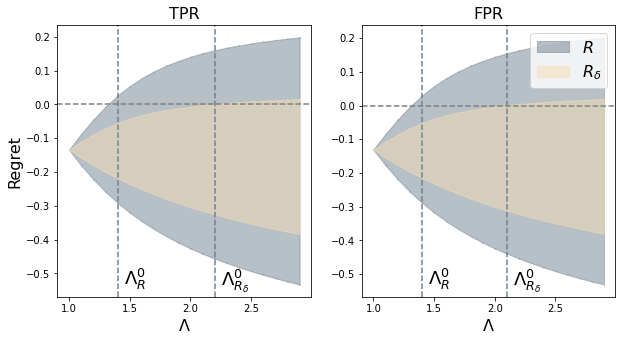

In [6]:
lambdas = np.arange(1, 3, .1)
brdf = experiments.design_sensitivity_exp(dgp, data, lambdas, n_sims=10)
plots.plot_design_sensitivity(brdf)

# Experiment: Exclusion restriction violation tests

outcome regression error: 0.02128225932823449
propensitiy error: 0.028069798352787136
outcome regression error: 0.019120937351952947
propensitiy error: 0.028180163596128422
outcome regression error: 0.01977979162596287
propensitiy error: 0.028168661727956852
outcome regression error: 0.020499034393112084
propensitiy error: 0.02779718486060573
outcome regression error: 0.019765759190650035
propensitiy error: 0.028355007143790377
outcome regression error: 0.020653071712181652
propensitiy error: 0.027665359647747714
outcome regression error: 0.02038735763108953
propensitiy error: 0.02869145555129657
outcome regression error: 0.02013003276352511
propensitiy error: 0.0281756849379803
outcome regression error: 0.021749817811318527
propensitiy error: 0.028527589070135796
outcome regression error: 0.0219455734869702
propensitiy error: 0.028310137209222687
outcome regression error: 0.019701099035064527
propensitiy error: 0.028542963534269803
outcome regression error: 0.019903234021302726
propen

outcome regression error: 0.019725638595634712
propensitiy error: 0.029299738207130516
outcome regression error: 0.01882884067283084
propensitiy error: 0.0287385195488353
outcome regression error: 0.018648369189730923
propensitiy error: 0.028572486798308823
outcome regression error: 0.018626542298370227
propensitiy error: 0.02891402922390141
outcome regression error: 0.019102241219338397
propensitiy error: 0.02883219601015947
outcome regression error: 0.01957271738520049
propensitiy error: 0.026839737787674282
outcome regression error: 0.019342996198275605
propensitiy error: 0.027368432379913987
outcome regression error: 0.021466976997045372
propensitiy error: 0.02761547359711422
outcome regression error: 0.01899487336280337
propensitiy error: 0.02647722671161807
outcome regression error: 0.019536876137371942
propensitiy error: 0.027057974366561835
outcome regression error: 0.021019236635990413
propensitiy error: 0.02817835446814951
outcome regression error: 0.019349934818969457
propen

outcome regression error: 0.021808439688483495
propensitiy error: 0.030164012173814266
outcome regression error: 0.021278964320957338
propensitiy error: 0.02960919562743517
outcome regression error: 0.021827293678755657
propensitiy error: 0.029516182572476794
outcome regression error: 0.02224485392362238
propensitiy error: 0.0292960425856501
outcome regression error: 0.022116871538164943
propensitiy error: 0.029722838647931852
outcome regression error: 0.019002158166503812
propensitiy error: 0.029306101467819125
outcome regression error: 0.02091552849982137
propensitiy error: 0.02955976219450288
outcome regression error: 0.019638536862293138
propensitiy error: 0.029236593022434205
outcome regression error: 0.018095881546299125
propensitiy error: 0.029308381225033705
outcome regression error: 0.02034783774513964
propensitiy error: 0.02956205689623323
outcome regression error: 0.02202012464887885
propensitiy error: 0.02856437660070279
outcome regression error: 0.02165440963432169
propens

outcome regression error: 0.0187812436473643
propensitiy error: 0.029113993720610264
outcome regression error: 0.01958531344575266
propensitiy error: 0.028763180731531383
outcome regression error: 0.01968981392344683
propensitiy error: 0.0287163358922717
outcome regression error: 0.020068233155742136
propensitiy error: 0.027913047179029284
outcome regression error: 0.019497125540641706
propensitiy error: 0.028745681570766422
outcome regression error: 0.019713842339086823
propensitiy error: 0.027939325378059876
outcome regression error: 0.019494919058858855
propensitiy error: 0.02833037687139923
outcome regression error: 0.018898298755861707
propensitiy error: 0.027731209018288766
outcome regression error: 0.01937704692658785
propensitiy error: 0.028267695300190077
outcome regression error: 0.020834011071785712
propensitiy error: 0.02921030265840506
outcome regression error: 0.020814588951345095
propensitiy error: 0.02920121619468615
outcome regression error: 0.022579607980226693
propen

outcome regression error: 0.020996256501938596
propensitiy error: 0.029561379513477974
outcome regression error: 0.020209874029286732
propensitiy error: 0.028809946424079306
outcome regression error: 0.022322981323297023
propensitiy error: 0.02905114647919083
outcome regression error: 0.02159668681885789
propensitiy error: 0.028220893297272794
outcome regression error: 0.020788445437550925
propensitiy error: 0.02862095909856794
outcome regression error: 0.01964542431206842
propensitiy error: 0.027772390145937784
outcome regression error: 0.01962111835290647
propensitiy error: 0.02893370455129045
outcome regression error: 0.01934230164489557
propensitiy error: 0.02874582857100801
outcome regression error: 0.01954770510761705
propensitiy error: 0.028702821024216195
outcome regression error: 0.019846901421235245
propensitiy error: 0.02860787437431183
outcome regression error: 0.0193827768212373
propensitiy error: 0.02848668635926254
outcome regression error: 0.018790047997958425
propensit

outcome regression error: 0.022806714588316488
propensitiy error: 0.028707405219859157
outcome regression error: 0.020126562925101205
propensitiy error: 0.029574068475086705
outcome regression error: 0.01996210821350853
propensitiy error: 0.028732250639665283
outcome regression error: 0.019831026755083882
propensitiy error: 0.02847300033825077
outcome regression error: 0.021664768247192774
propensitiy error: 0.027476794775419106
outcome regression error: 0.020240292674587504
propensitiy error: 0.02914903820455459
outcome regression error: 0.019997961106838033
propensitiy error: 0.02890920452956079
outcome regression error: 0.02057855048903472
propensitiy error: 0.029565914550190125
outcome regression error: 0.01871966356755133
propensitiy error: 0.028552392964862228
outcome regression error: 0.02071123785374713
propensitiy error: 0.0285111489552026
outcome regression error: 0.017887861654407797
propensitiy error: 0.027564976761291216
outcome regression error: 0.01807382408217688
propen

outcome regression error: 0.020558349989504534
propensitiy error: 0.027922264978615986
outcome regression error: 0.020241880367937407
propensitiy error: 0.028152560256558132
outcome regression error: 0.019967144534928337
propensitiy error: 0.028780743082784745
outcome regression error: 0.019400357434768825
propensitiy error: 0.028177574410940848
outcome regression error: 0.01997189060228063
propensitiy error: 0.028317522944604295
outcome regression error: 0.02083466308271786
propensitiy error: 0.028270443820105347
outcome regression error: 0.0196832051930203
propensitiy error: 0.02887462598337602
outcome regression error: 0.01914712138943225
propensitiy error: 0.02858875685590947
outcome regression error: 0.020199733513513656
propensitiy error: 0.027964495351568395
outcome regression error: 0.021140233337209217
propensitiy error: 0.0280837612643164
outcome regression error: 0.02134152533754462
propensitiy error: 0.02752559440899334
outcome regression error: 0.020779326015768124
propens

outcome regression error: 0.01845990427504646
propensitiy error: 0.0291954261746125
outcome regression error: 0.018573318992729935
propensitiy error: 0.028639548741591837
outcome regression error: 0.0188940335595827
propensitiy error: 0.028761152714106543
outcome regression error: 0.019150759111668258
propensitiy error: 0.02909021743990021
outcome regression error: 0.020478035171893175
propensitiy error: 0.029397580926116742
outcome regression error: 0.0186887567105361
propensitiy error: 0.028373111652776305
outcome regression error: 0.018373985294988182
propensitiy error: 0.02763869097548963
outcome regression error: 0.019079193731086342
propensitiy error: 0.02763930972350056
outcome regression error: 0.019770254267470807
propensitiy error: 0.028075346446387005
outcome regression error: 0.019359615826814353
propensitiy error: 0.02834057843332529
outcome regression error: 0.020034182469648172
propensitiy error: 0.02842002516504581
outcome regression error: 0.019877617527477083
propensi

outcome regression error: 0.019130144106988343
propensitiy error: 0.029608984347583567
outcome regression error: 0.018617495466032138
propensitiy error: 0.029757508235867938
outcome regression error: 0.02011029133538737
propensitiy error: 0.0289157116376647
outcome regression error: 0.01971709828272317
propensitiy error: 0.02957157822828193
outcome regression error: 0.020413085889878578
propensitiy error: 0.029169835969448835
outcome regression error: 0.01851839659402934
propensitiy error: 0.028266673342250817
outcome regression error: 0.019695365384024163
propensitiy error: 0.028736475906610173
outcome regression error: 0.01871342084871165
propensitiy error: 0.029917602039719864
outcome regression error: 0.020343173791011773
propensitiy error: 0.02823128898476527
outcome regression error: 0.02199736482292606
propensitiy error: 0.02817470283063654
outcome regression error: 0.024444271590169687
propensitiy error: 0.02958559813252957
outcome regression error: 0.02196548561752671
propensi

outcome regression error: 0.019099445293412582
propensitiy error: 0.02906686746488101
outcome regression error: 0.017119795961960633
propensitiy error: 0.028170892689762972
outcome regression error: 0.01779029319019292
propensitiy error: 0.02899062786041819
outcome regression error: 0.017675102181508646
propensitiy error: 0.028284452996521957
outcome regression error: 0.017635767788397344
propensitiy error: 0.02885112498616801
outcome regression error: 0.019017307958188037
propensitiy error: 0.029157701015692372
outcome regression error: 0.019885132827816267
propensitiy error: 0.029495237626835882
outcome regression error: 0.018789362313814343
propensitiy error: 0.029424640363452628
outcome regression error: 0.018933117046388497
propensitiy error: 0.028931348230025508
outcome regression error: 0.01997115213553567
propensitiy error: 0.02846938870504333
outcome regression error: 0.02117240563008504
propensitiy error: 0.0284564491891975
outcome regression error: 0.021833159428673775
prope

outcome regression error: 0.017977912941559353
propensitiy error: 0.02814943957380831
outcome regression error: 0.020250961381819498
propensitiy error: 0.028604065460614714
outcome regression error: 0.019446137726065533
propensitiy error: 0.02875710912153628
outcome regression error: 0.019382601335885125
propensitiy error: 0.02776929566570498
outcome regression error: 0.020111628368556154
propensitiy error: 0.027697086301708737
outcome regression error: 0.019130410637607093
propensitiy error: 0.02852786546429388
outcome regression error: 0.018704593270736942
propensitiy error: 0.028495959617494727
outcome regression error: 0.01923496174141364
propensitiy error: 0.027097588232030363
outcome regression error: 0.020803601570326513
propensitiy error: 0.02814147426099656
outcome regression error: 0.01952185331214728
propensitiy error: 0.028531302656787126
outcome regression error: 0.019642760794970356
propensitiy error: 0.02784482303401474
outcome regression error: 0.018152425569917766
prop

outcome regression error: 0.020134906904203723
propensitiy error: 0.02880931952154191
outcome regression error: 0.018999538309793177
propensitiy error: 0.02873958765666945
outcome regression error: 0.01901038802958557
propensitiy error: 0.028787662653239572
outcome regression error: 0.01967537693793458
propensitiy error: 0.02867020639017268
outcome regression error: 0.021360148260407417
propensitiy error: 0.02873358801243694
outcome regression error: 0.018410650387535938
propensitiy error: 0.02851386312984841
outcome regression error: 0.017697626228656
propensitiy error: 0.028548490453630587
outcome regression error: 0.018292446711312606
propensitiy error: 0.028336590164320313
outcome regression error: 0.018637191382951446
propensitiy error: 0.028557212822223614
outcome regression error: 0.017984647187540097
propensitiy error: 0.02876143327069937
outcome regression error: 0.018851047920309158
propensitiy error: 0.028768628529287178
outcome regression error: 0.018885282026214298
propens

outcome regression error: 0.019180218169137314
propensitiy error: 0.02891254095855021
outcome regression error: 0.01820923524448069
propensitiy error: 0.028234806343395754
outcome regression error: 0.0174643172100988
propensitiy error: 0.0287055924191916
outcome regression error: 0.018384416961788403
propensitiy error: 0.029366008485327232
outcome regression error: 0.017537878980867505
propensitiy error: 0.028990760826999903
outcome regression error: 0.01767517637388215
propensitiy error: 0.028771860164720893
outcome regression error: 0.02139699762070002
propensitiy error: 0.02861716584409445
outcome regression error: 0.01975190692298194
propensitiy error: 0.027886527833631457
outcome regression error: 0.019845911110248745
propensitiy error: 0.0284545722203805
outcome regression error: 0.020388114827340594
propensitiy error: 0.029150334238977015
outcome regression error: 0.01884908110847919
propensitiy error: 0.028190682483026783
outcome regression error: 0.02008143808250413
propensiti

outcome regression error: 0.01743770262221268
propensitiy error: 0.03040343842507623
outcome regression error: 0.0172209014779337
propensitiy error: 0.028022008247972366
outcome regression error: 0.01755019723559417
propensitiy error: 0.028414391879964397
outcome regression error: 0.018403135305912165
propensitiy error: 0.029445504794813337
outcome regression error: 0.018057911068413795
propensitiy error: 0.028955905681077185
outcome regression error: 0.019352288633804136
propensitiy error: 0.029835053611738948
outcome regression error: 0.018348233576457356
propensitiy error: 0.03057014809553112
outcome regression error: 0.018148567681403334
propensitiy error: 0.02901007244797093
outcome regression error: 0.01793006951352684
propensitiy error: 0.0292304696099843
outcome regression error: 0.017662587404131496
propensitiy error: 0.029355056588617107
outcome regression error: 0.018840851394101604
propensitiy error: 0.030231529055617202
outcome regression error: 0.01760783264179677
propens

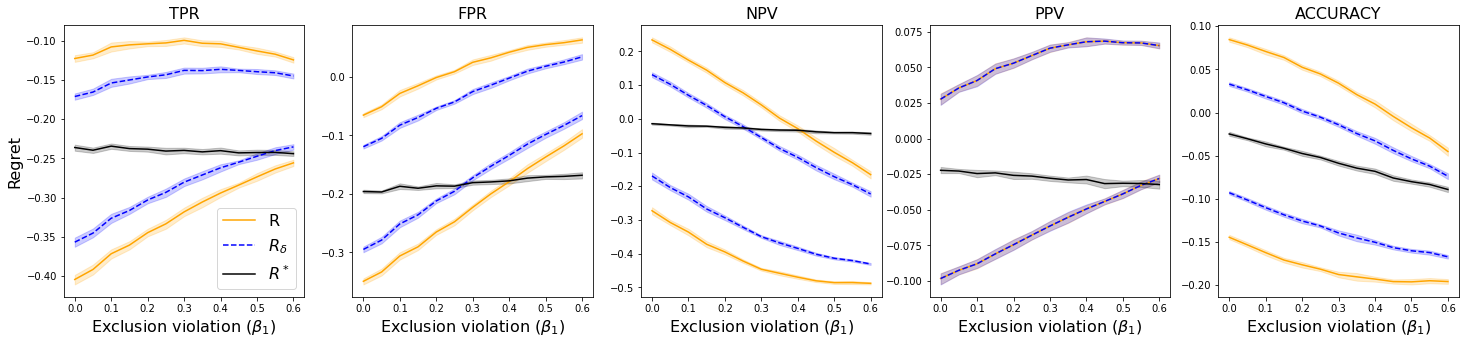

In [7]:
lambdas = np.arange(1, 2.6, .1)
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda_star': 1.7,
    'id_assumption': 'IV'
}

dgp = set_dgp_config(dgp, 'IV')
dgp['beta_zd'] = 1.25
beta_zy = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, .5, .55, .6]
bedf = experiments.exclusion_sensitivity_experiment(dgp, beta_zy, n_sims=20, est_method='plugin', K=5)
plot_exclusion_sensitivity(bedf)

# Experiment: Relevance violation tests

outcome regression error: 0.06824760059892879
propensitiy error: 0.049074306125713806
outcome regression error: 0.06868448442286533
propensitiy error: 0.04931754631080577
outcome regression error: 0.06846216492365213
propensitiy error: 0.04970538042965789
outcome regression error: 0.06705595438734767
propensitiy error: 0.049983216022735276
outcome regression error: 0.06686022031671669
propensitiy error: 0.04830704358876422
outcome regression error: 0.06536468060002483
propensitiy error: 0.049133010872390206
outcome regression error: 0.06498370644245755
propensitiy error: 0.048804204700062095
outcome regression error: 0.0666571887496362
propensitiy error: 0.04937744681874213
outcome regression error: 0.06561882667748063
propensitiy error: 0.04886659123875899
outcome regression error: 0.06562634593360213
propensitiy error: 0.049739069722970625
outcome regression error: 0.06717501659842362
propensitiy error: 0.048001137545002445
outcome regression error: 0.06656584472157129
propensitiy er

outcome regression error: 0.06478433973342589
propensitiy error: 0.04627073747384061
outcome regression error: 0.06586805664433795
propensitiy error: 0.046935776305874324
outcome regression error: 0.06607808634051994
propensitiy error: 0.04693522685820543
outcome regression error: 0.06489211870825648
propensitiy error: 0.0461937575445767
outcome regression error: 0.0650160245877055
propensitiy error: 0.04609210298917004
outcome regression error: 0.0654831251501617
propensitiy error: 0.04710365924755479
outcome regression error: 0.06755739334339014
propensitiy error: 0.049184378605014095
outcome regression error: 0.06621928854905565
propensitiy error: 0.04761417625166365
outcome regression error: 0.06430554612256875
propensitiy error: 0.046814070707313124
outcome regression error: 0.0652336407445634
propensitiy error: 0.046328474551815435
outcome regression error: 0.06623287162316166
propensitiy error: 0.047061877563202896
outcome regression error: 0.06653660206076172
propensitiy error:

outcome regression error: 0.06715590840634528
propensitiy error: 0.043371830389188244
outcome regression error: 0.06732510937589387
propensitiy error: 0.04359931015777097
outcome regression error: 0.06632848717571312
propensitiy error: 0.04292531793372886
outcome regression error: 0.06719456225760907
propensitiy error: 0.042873547803713975
outcome regression error: 0.06668962771178193
propensitiy error: 0.04317783715352635
outcome regression error: 0.06562115888122955
propensitiy error: 0.04382732047536598
outcome regression error: 0.06552500887339424
propensitiy error: 0.04338151720010684
outcome regression error: 0.06552630526511913
propensitiy error: 0.04367416847257293
outcome regression error: 0.06537126603857357
propensitiy error: 0.04283510067389015
outcome regression error: 0.06486014022341921
propensitiy error: 0.04311114541131415
outcome regression error: 0.06614715251523368
propensitiy error: 0.04326398863763586
outcome regression error: 0.06833609653785172
propensitiy error

outcome regression error: 0.06451780205999541
propensitiy error: 0.0385280849833854
outcome regression error: 0.06484811392738268
propensitiy error: 0.039198151582252344
outcome regression error: 0.0656233135861742
propensitiy error: 0.03874671853126407
outcome regression error: 0.06438337285680781
propensitiy error: 0.03833778477633692
outcome regression error: 0.0655929186388131
propensitiy error: 0.03861658555181829
outcome regression error: 0.06510781811212477
propensitiy error: 0.03855167883151423
outcome regression error: 0.06442737976090343
propensitiy error: 0.03789604433824311
outcome regression error: 0.06549231972411579
propensitiy error: 0.039120933581756744
outcome regression error: 0.06590785127596939
propensitiy error: 0.03930376173885446
outcome regression error: 0.06588809496888276
propensitiy error: 0.03777274905976745
outcome regression error: 0.06609093487467733
propensitiy error: 0.03893817349063522
outcome regression error: 0.06662298712411129
propensitiy error: 0

outcome regression error: 0.06533587316621489
propensitiy error: 0.034626055788293496
outcome regression error: 0.06625393462033628
propensitiy error: 0.033506603018997105
outcome regression error: 0.06598510159653002
propensitiy error: 0.03381793038152909
outcome regression error: 0.06525104019532975
propensitiy error: 0.03288346980408259
outcome regression error: 0.06601939775892172
propensitiy error: 0.03420828273679233
outcome regression error: 0.0650695409603367
propensitiy error: 0.032831373445561696
outcome regression error: 0.06473096984490279
propensitiy error: 0.033071325967555854
outcome regression error: 0.06799457301467425
propensitiy error: 0.03450359346634332
outcome regression error: 0.0658441701036937
propensitiy error: 0.034081288324940034
outcome regression error: 0.06668547526062352
propensitiy error: 0.03325471745085105
outcome regression error: 0.06701779486595087
propensitiy error: 0.03376889339395136
outcome regression error: 0.06646098050587633
propensitiy erro

outcome regression error: 0.06581689687492831
propensitiy error: 0.029669630417692765
outcome regression error: 0.06463505394911022
propensitiy error: 0.029346979886112626
outcome regression error: 0.06614345747522109
propensitiy error: 0.02839285057256346
outcome regression error: 0.06737241287403842
propensitiy error: 0.029555091902044375
outcome regression error: 0.06432293917511563
propensitiy error: 0.028498131483963553
outcome regression error: 0.06611782423547516
propensitiy error: 0.028289352369835895
outcome regression error: 0.06638430372341808
propensitiy error: 0.029367122232455748
outcome regression error: 0.06536032477238106
propensitiy error: 0.028284947191720505
outcome regression error: 0.06581947462997155
propensitiy error: 0.028573826969751116
outcome regression error: 0.06592311118573091
propensitiy error: 0.02873950359929387
outcome regression error: 0.06484169399558147
propensitiy error: 0.028693532594052905
outcome regression error: 0.06550755552205086
propensiti

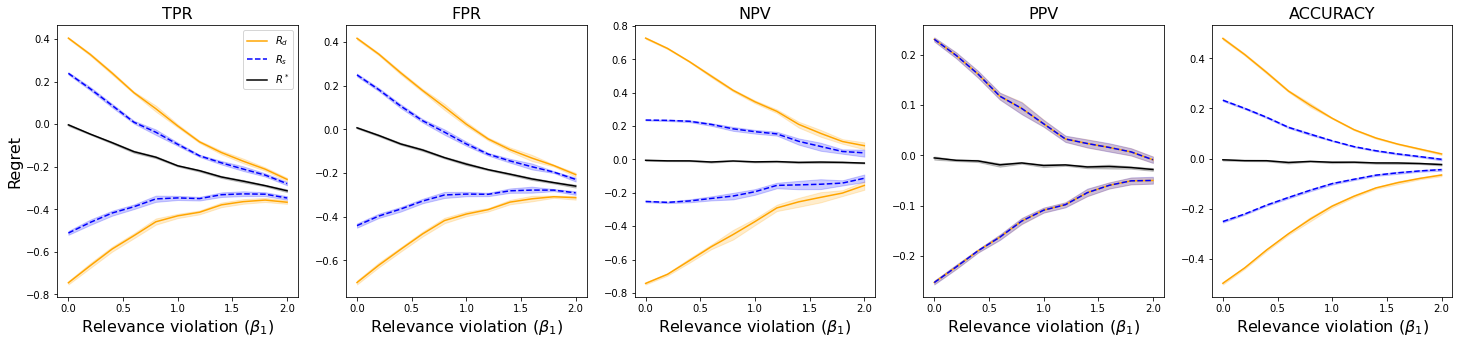

In [3]:
lambdas = np.arange(1, 2.6, .1)
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.5,
    'lambda_star': 1.7,
    'id_assumption': 'IV'
}

iv_dgp = set_dgp_config(dgp, 'IV')
beta_zd = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
brdf = experiments.relevance_sensitivity_experiment(iv_dgp, beta_zd, n_sims=10)



## Robustness check: MSM $\Lambda$ coverage

In [28]:
Nsims = 10
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.4,
    'id_assumption': 'MSM'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
lambda_star = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]

msm_bounds = []

for ls in lambda_star:
    
    msm_dgp['lambda_star'] = ls
    
    for sim in range(Nsims):
        
        data = generate_data(msm_dgp)
        bounds = estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)
        bounds['ls'] = ls
        msm_bounds.append(bounds)

msmdf = pd.concat(msm_bounds)


outcome regression error: 0.08549464340329309
propensitiy error: 0.049029187430237334
outcome regression error: 0.08822013061844183
propensitiy error: 0.04850753936129217
outcome regression error: 0.08854845889604591
propensitiy error: 0.04965247546464513
outcome regression error: 0.09037595514194433
propensitiy error: 0.04902478227180549
outcome regression error: 0.0857147333286839
propensitiy error: 0.0492182038032904
outcome regression error: 0.08601531689499421
propensitiy error: 0.050016122753218456
outcome regression error: 0.087408516538992
propensitiy error: 0.049359005922241
outcome regression error: 0.08500032322624054
propensitiy error: 0.04877678810680359
outcome regression error: 0.0884402197489049
propensitiy error: 0.04849636858829813
outcome regression error: 0.08301924697572446
propensitiy error: 0.04862817821315876
outcome regression error: 0.08582207122923872
propensitiy error: 0.05025830450699422
outcome regression error: 0.0872635887039093
propensitiy error: 0.0499

outcome regression error: 0.08659467119759165
propensitiy error: 0.04792604421336182
outcome regression error: 0.0886972650602263
propensitiy error: 0.049610473582517835
outcome regression error: 0.08788467104338958
propensitiy error: 0.04843399158135503
outcome regression error: 0.08956911308663662
propensitiy error: 0.04773039440502795
outcome regression error: 0.08445216257461294
propensitiy error: 0.04862924531569587
outcome regression error: 0.0851280476490773
propensitiy error: 0.04810509528382983
outcome regression error: 0.08508127164284719
propensitiy error: 0.0488663583961854
outcome regression error: 0.08612221793642408
propensitiy error: 0.04936238947719006
outcome regression error: 0.08769254130320386
propensitiy error: 0.048768864784235554
outcome regression error: 0.08428391407804087
propensitiy error: 0.05055034634850514
outcome regression error: 0.08935788202701848
propensitiy error: 0.05160675313751227
outcome regression error: 0.08620231805921835
propensitiy error: 0

outcome regression error: 0.08514633449494573
propensitiy error: 0.049184192975654566
outcome regression error: 0.0883620266536892
propensitiy error: 0.04909544337853465
outcome regression error: 0.08625590495593108
propensitiy error: 0.05190234553277594
outcome regression error: 0.08619393493592067
propensitiy error: 0.0498160116750796
outcome regression error: 0.08693212849479659
propensitiy error: 0.04906141118673092
outcome regression error: 0.08459834855087982
propensitiy error: 0.0493986772866959
outcome regression error: 0.08781350147657165
propensitiy error: 0.050055302887923536
outcome regression error: 0.08251612326154989
propensitiy error: 0.047662435739158474
outcome regression error: 0.08405390257545223
propensitiy error: 0.049764433703862646
outcome regression error: 0.08276359909921878
propensitiy error: 0.04800114745338399
outcome regression error: 0.08131857211921176
propensitiy error: 0.047088301337217454
outcome regression error: 0.08255634834773083
propensitiy error

outcome regression error: 0.08638203396005832
propensitiy error: 0.050172095666178924
outcome regression error: 0.08453012650381302
propensitiy error: 0.05025260012634534
outcome regression error: 0.08439598893367761
propensitiy error: 0.049937706300998724
outcome regression error: 0.08446951073152868
propensitiy error: 0.051751981867324645
outcome regression error: 0.08535010529367719
propensitiy error: 0.048470273634463365
outcome regression error: 0.08856368092206998
propensitiy error: 0.05169359218014056
outcome regression error: 0.08627160026427382
propensitiy error: 0.04960451059246701
outcome regression error: 0.0851209301594064
propensitiy error: 0.049258660353328446
outcome regression error: 0.08635103642054683
propensitiy error: 0.05237903326399332
outcome regression error: 0.08599469321787577
propensitiy error: 0.05031336544573604
outcome regression error: 0.08673902959641282
propensitiy error: 0.05170159785963322
outcome regression error: 0.0860945700787173
propensitiy erro

outcome regression error: 0.08708358460648907
propensitiy error: 0.04932326130975409
outcome regression error: 0.0872446614547315
propensitiy error: 0.04924773942198552
outcome regression error: 0.08423638120147792
propensitiy error: 0.04739458172529358
outcome regression error: 0.08388533848479728
propensitiy error: 0.04812632936805998
outcome regression error: 0.08592426353926785
propensitiy error: 0.048096391981982345
outcome regression error: 0.0856526320098296
propensitiy error: 0.04721145618286746
outcome regression error: 0.0871275482430239
propensitiy error: 0.048031513625027736
outcome regression error: 0.08797470041400288
propensitiy error: 0.05142381186810765
outcome regression error: 0.08679395786988009
propensitiy error: 0.04942481900043837
outcome regression error: 0.08576838181640073
propensitiy error: 0.04804605417103558
outcome regression error: 0.08687336926611818
propensitiy error: 0.05035441252925347
outcome regression error: 0.08897547991203102
propensitiy error: 0

outcome regression error: 0.08610230759790084
propensitiy error: 0.04767422434845849
outcome regression error: 0.08813760381733994
propensitiy error: 0.04958218373814521
outcome regression error: 0.08950088837324484
propensitiy error: 0.048279289194776885
outcome regression error: 0.08840077833829647
propensitiy error: 0.05024436933462643
outcome regression error: 0.08728671146863845
propensitiy error: 0.050097990459876895
outcome regression error: 0.08887344163844042
propensitiy error: 0.05065764467692544
outcome regression error: 0.08407918772290116
propensitiy error: 0.049629627430680154
outcome regression error: 0.08911566441570283
propensitiy error: 0.05128640722606525
outcome regression error: 0.08817513023811031
propensitiy error: 0.05108209891561186
outcome regression error: 0.0878501064131375
propensitiy error: 0.04734447612131306
outcome regression error: 0.08509410738627123
propensitiy error: 0.04995387343192172
outcome regression error: 0.09017537118997071
propensitiy error

outcome regression error: 0.08641849576973869
propensitiy error: 0.049536657721456094
outcome regression error: 0.08597583771413204
propensitiy error: 0.049349095410582945
outcome regression error: 0.08712918438099314
propensitiy error: 0.05099818348416496
outcome regression error: 0.08764983791390887
propensitiy error: 0.050966430710907284
outcome regression error: 0.08739395325304526
propensitiy error: 0.05001288077044894
outcome regression error: 0.08835336370448488
propensitiy error: 0.05027977442538734
outcome regression error: 0.08869690506086561
propensitiy error: 0.05037986383355975
outcome regression error: 0.08932257647457881
propensitiy error: 0.04998444598349782
outcome regression error: 0.08510019135872471
propensitiy error: 0.048310158821285684
outcome regression error: 0.0887265723537968
propensitiy error: 0.05010261534320972
outcome regression error: 0.08521554213246466
propensitiy error: 0.049648389227098924
outcome regression error: 0.08426340935395879
propensitiy err

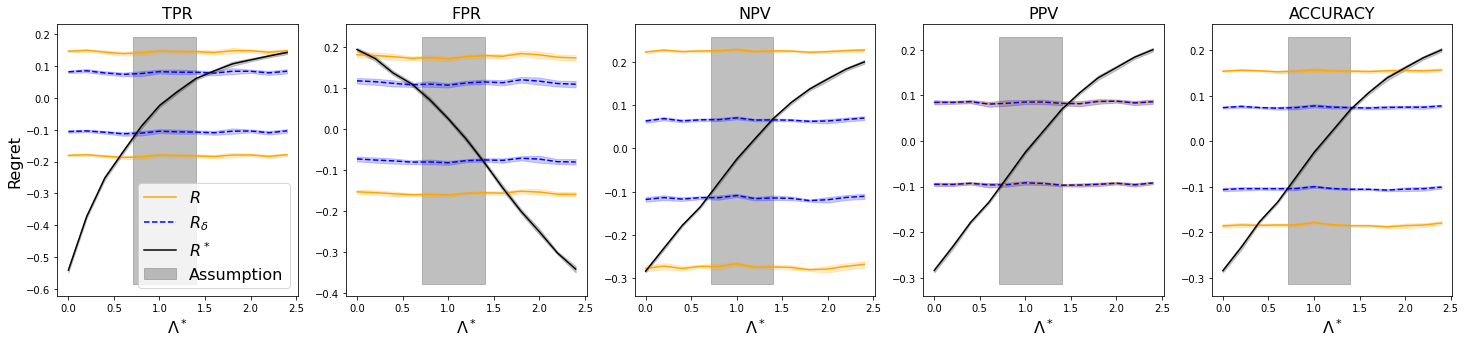

In [30]:
lam = msm_dgp['lambda']
metrics = msmdf['metric'].unique().tolist()

fig, axes = plt.subplots(1, 5, figsize=(25, 5)) # Adjust the figsize as needed

for i, metric in enumerate(metrics):
    
    # Filter the DataFrame for the current metric
    metric_df = msmdf[msmdf['metric'] == metric]
    
    # Reset the index to avoid the duplicate labels error
    metric_df = metric_df.reset_index(drop=True)
    ymin = metric_df[['Rs_down', 'Rs_up', 'Rd_down', 'Rd_up', 'R_oracle']].min().min()
    ymax = metric_df[['Rs_down', 'Rs_up', 'Rd_down', 'Rd_up', 'R_oracle']].max().max()
    
    # Create each lineplot on the corresponding subplot axis
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rs_up', color='orange', linestyle='-', label='$R$')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rs_down', color='orange', linestyle='-')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rd_up', color='b', linestyle='--', label='$R_{\delta}$')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rd_down', color='b', linestyle='--')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='R_oracle', color='black', label='$R^*$')

    # Set the titles, labels, etc.
    axes[i].set_xlabel(r'$\Lambda^*$', fontsize=16)
    axes[i].set_title(f'{utils.metric_dict[metric]}', fontsize=16)
    axes[i].set_ylabel(f'', fontsize=16)
    
    ymin, ymax = axes[i].get_ylim()
    axes[i].fill_between([lam**-1, lam], ymin, ymax, color='grey',
                         alpha=0.5, zorder=-1, label='Assumption')
    axes[i].legend().set_visible(False)
    
axes[0].set_ylabel(f'Regret', fontsize=16)
axes[0].legend(fontsize=16)
plt.savefig('figs/msm_assumption.pdf', dpi=500, bbox_inches='tight')